# Portugese Bank Marketing Campaign Analysis

## Project ID: PRCP-1000-PortugeseBank

## Domain: Finance/Banking

This project analyzes a Portuguese bank’s direct marketing campaign data to understand customer behavior and predict whether a client will subscribe to a term deposit.

The dataset contains demographic, financial, campaign-related, and macroeconomic features collected from May 2008 to November 2010.

This project focuses on:
1. Perform Exploratory Data Analysis (EDA) to extract insights.
2. Build predictive models to identify customers likely to subscribe.
3. Provide actionable recommendations for the bank’s marketing team.


In [1]:
#libraries
import numpy as np
import pandas as pd

#visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Warning control
import warnings
warnings.filterwarnings("ignore")


In [2]:
# plot style
sns.set(style="whitegrid")

# Display all columns
pd.set_option("display.max_columns", None)

# plot size
plt.rcParams["figure.figsize"] = (8, 5)


# Data Description

In [3]:
#loading dataset
df= pd.read_csv('bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing values found in the dataset

In [8]:
#dropping duplicates
df = df.drop_duplicates()
df.shape

(41176, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## Data Cleaning Summary
- The dataset was checked for missing values and **no null values were found**.
- **12 duplicate records were identified and removed**, reducing the dataset size to **41,176 rows**.
- Data types were verified and found to be appropriate for analysis.
- `"unknown"` values in categorical features were retained as valid categories.
- Extreme values in numerical features were preserved as they represent real customer and campaign behavior.
- The `duration` variable will be excluded from predictive modeling to prevent data leakage, as it is only known after the call.

After cleaning, the dataset is complete, consistent, and ready for further analysis and modeling.


# Exploratory Data Analysis 

##  Part 1- Univariate Analysis

In [10]:
# class imbalance check
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

The majority of customers did not opt for the term deposit, while only a small fraction subscribed.

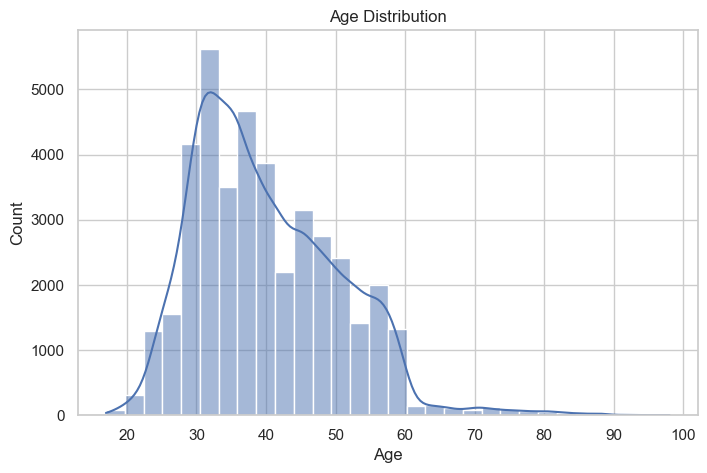

In [11]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The age distribution is right-skewed.
- The majority of customers fall within the age range of 30–50 years.
- Very few customers are younger than 20 or older than 70.

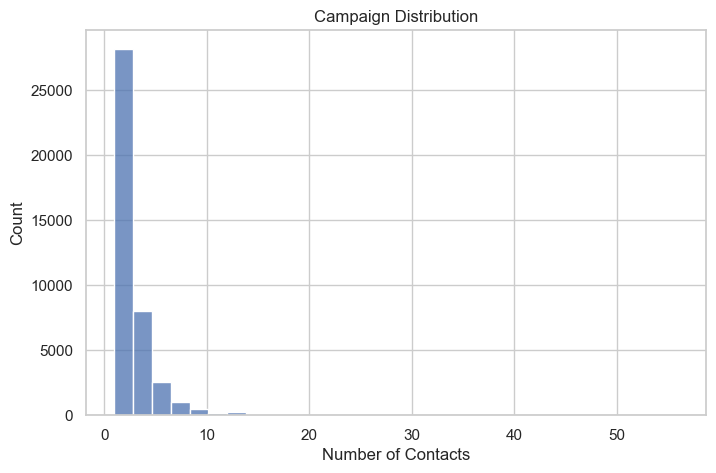

In [12]:
sns.histplot(df['campaign'], bins=30, kde=False)
plt.title('Campaign Distribution')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.show()

- The majority of customers were contacted between 1 and 3 times during the campaign.
- As the number of contacts increases, the number of customers decreases sharply.
- A small number of customers were contacted many times, indicating possible over-contacting during the campaign.

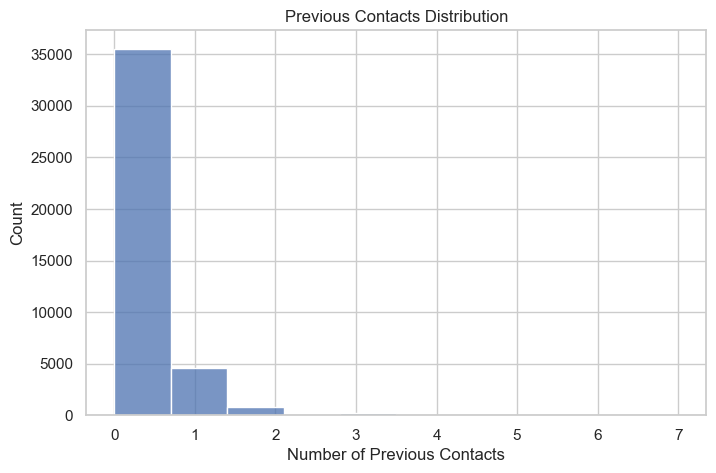

In [13]:
sns.histplot(df['previous'], bins=10)
plt.title('Previous Contacts Distribution')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')
plt.show()

- Most customers had no previous campaign contacts.
- Very few customers show repeated prior interactions.

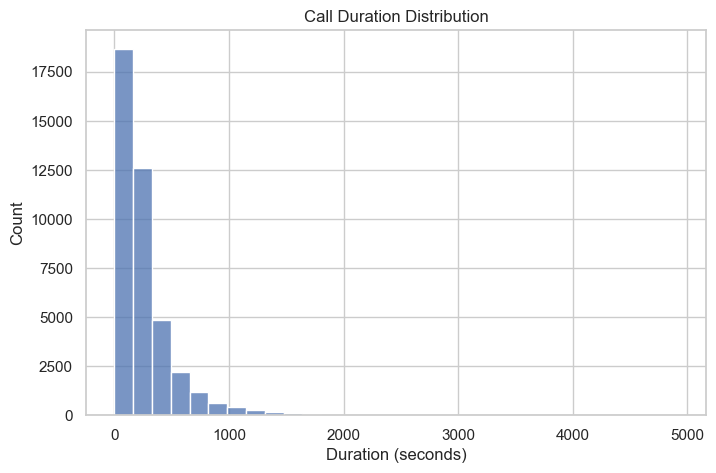

In [14]:
sns.histplot(df['duration'], bins=30)
plt.title('Call Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

- The duration of the last contact is highly right-skewed.
- Most calls are short in duration, while a small number of calls last significantly longer.
- This variable is strongly influenced by the outcome of the call and is only known after the call is completed.
- Therefore, `duration` will be excluded from predictive modeling to avoid data leakage.

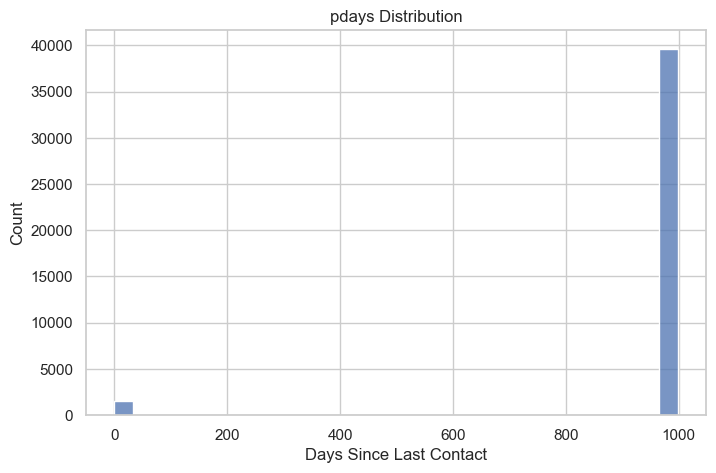

In [15]:
sns.histplot(df['pdays'], bins=30)
plt.title('pdays Distribution')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Count')
plt.show()

- The `pdays` variable shows a dominant value of 999, indicating that most customers were not contacted in previous campaigns.
- Only a small subset of customers had been contacted before the current campaign.
- This suggests that the campaign largely focused on new or previously uncontacted customers.

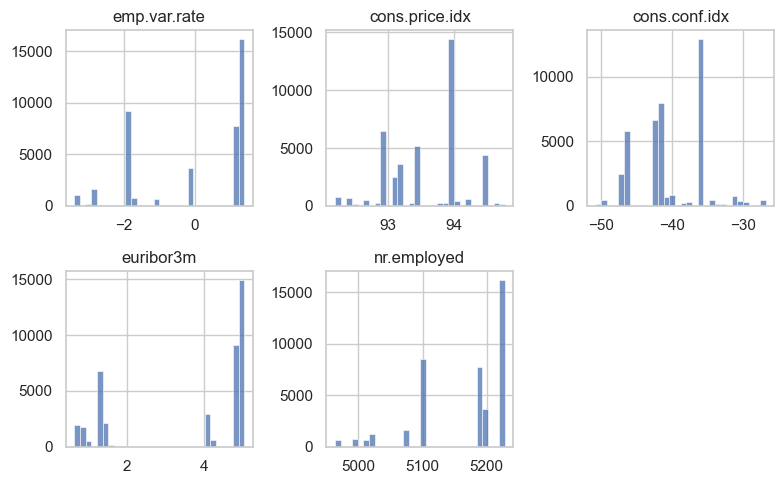

In [16]:
econ_cols = [
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

for i, col in enumerate(econ_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

- The economic indicators show clustered distributions with limited variation.
- These variables represent the broader economic conditions during the campaign period.
- On their own, they do not provide strong individual-level insights but serve as contextual features.

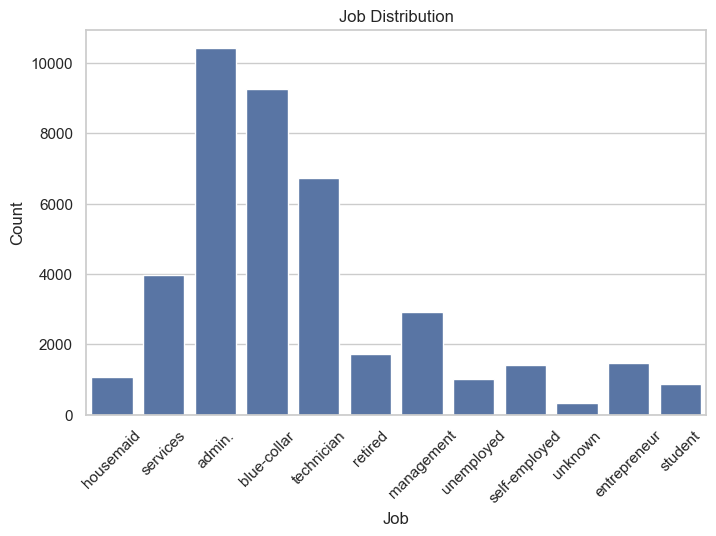

In [17]:
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

- The dataset contains customers from a wide range of job categories.
- Admin., blue-collar, and technician roles form the largest groups.
- Some job categories such as students, retired, unemployed, housemaid and entreoreneur customers are less frequent.


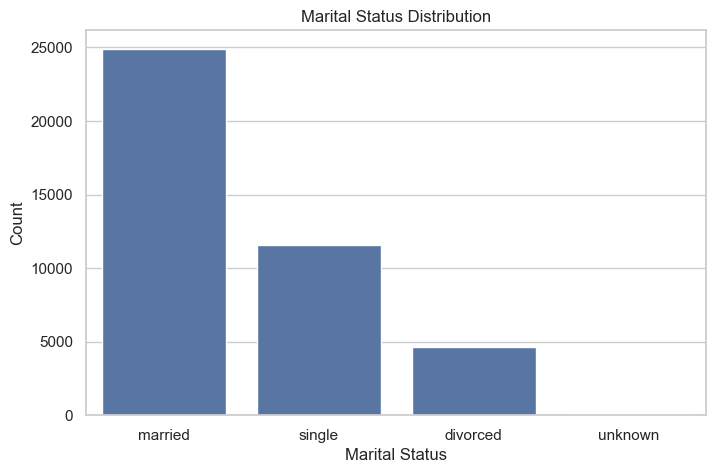

In [18]:
sns.countplot(x='marital', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

- Married customers forms the largest marital group.
- Single and divorced customers are less but also forms a significant portion in the dataset.

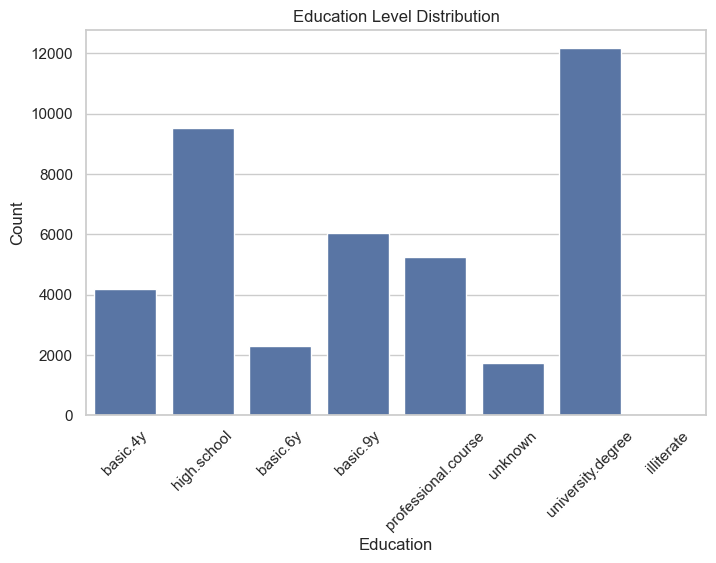

In [19]:
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

- Customers with university degrees and high school education are most common.
- Basic education levels (4y, 6y, 9y) are present in smaller proportions.
- Some records have unknown education levels.
- No customers are marked illeterate.

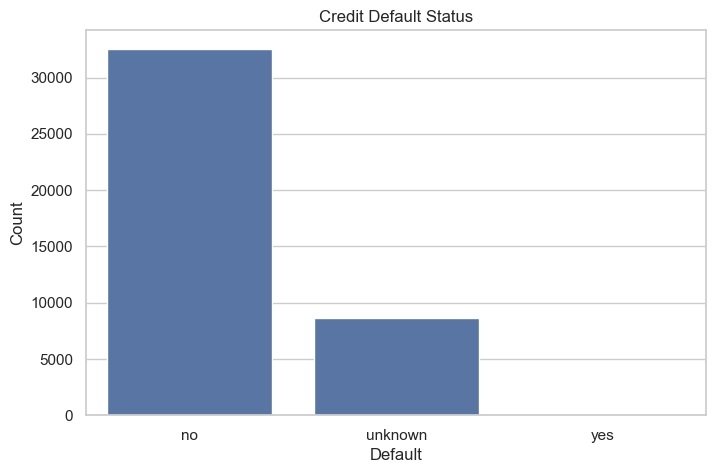

In [20]:
sns.countplot(x='default', data=df)
plt.title('Credit Default Status')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

In [21]:
df.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

- Most customers do not have a credit default history.
- Very few customers are marked as having defaulted.
- A portion of records contain unknown default status.

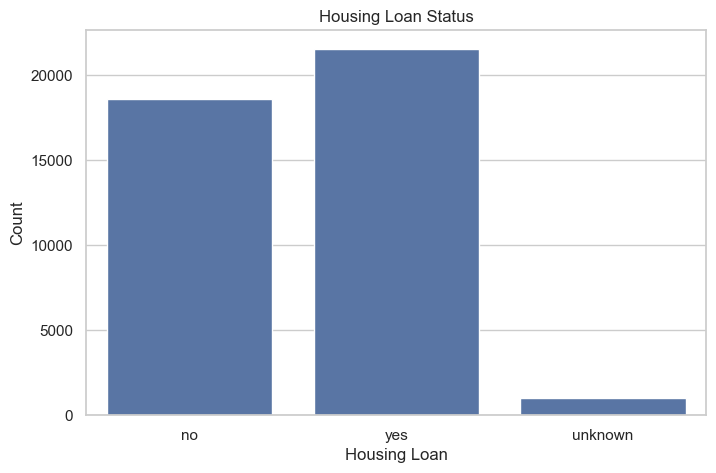

In [22]:
sns.countplot(x='housing', data=df)
plt.title('Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

- A large proportion of customers have housing loans.
- Customers without housing loans also form a significant group.
- Some records have unknown housing loan status.

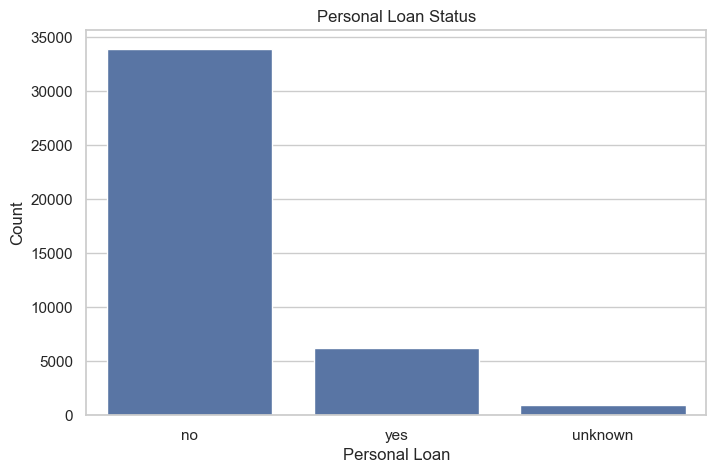

In [23]:
sns.countplot(x='loan', data=df)
plt.title('Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

- Many customers do not have a personal loan, only few customers have active personal loan.
- Some records are unknown.

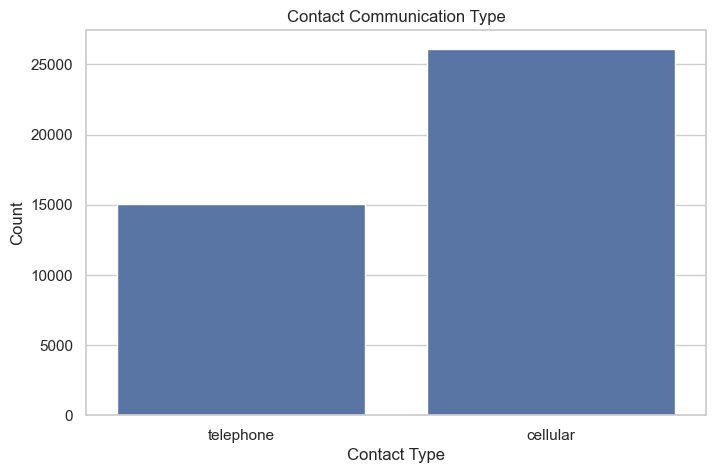

In [24]:
sns.countplot(x='contact', data=df)
plt.title('Contact Communication Type')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.show()

- Cellular communication is used more frequently than telephone.
- This indicates a preference for mobile-based contact during the campaign.

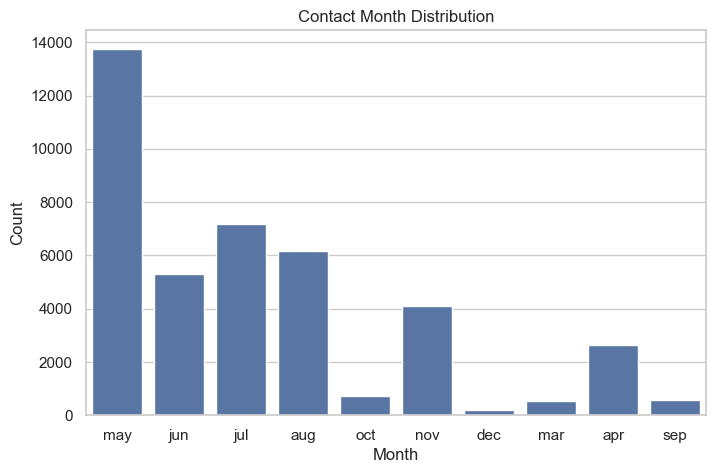

In [25]:
sns.countplot(x='month', data=df)
plt.title('Contact Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

- Customer contacts are concentrated in certain months.

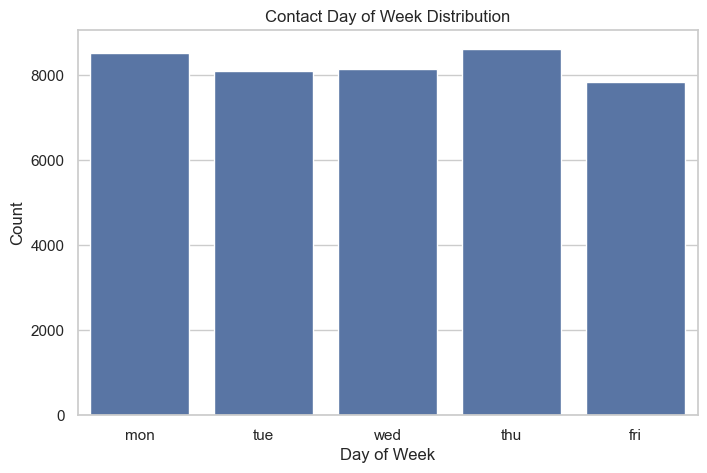

In [26]:
sns.countplot(x='day_of_week', data=df)
plt.title('Contact Day of Week Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

- Contacts are fairly evenly distributed across weekdays.
- No strong preference for a specific day of the week is observed.

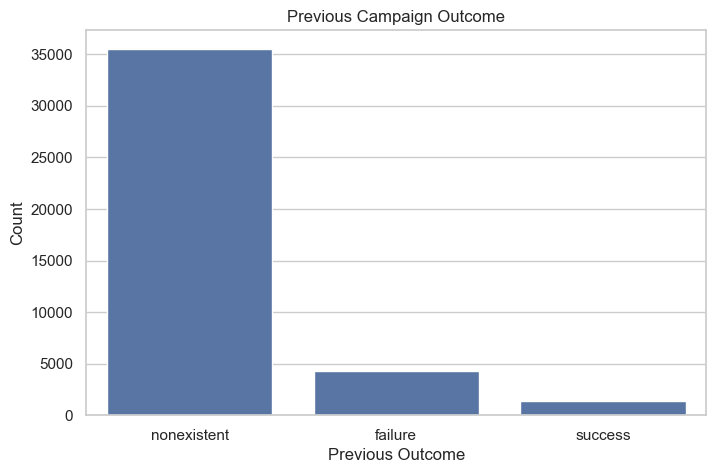

In [27]:
sns.countplot(x='poutcome', data=df)
plt.title('Previous Campaign Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

- The majority of customers have no recorded outcome from previous campaigns.
- Very few customers experienced a successful outcome in earlier campaigns.

## Part 2- Bivariate Analysis

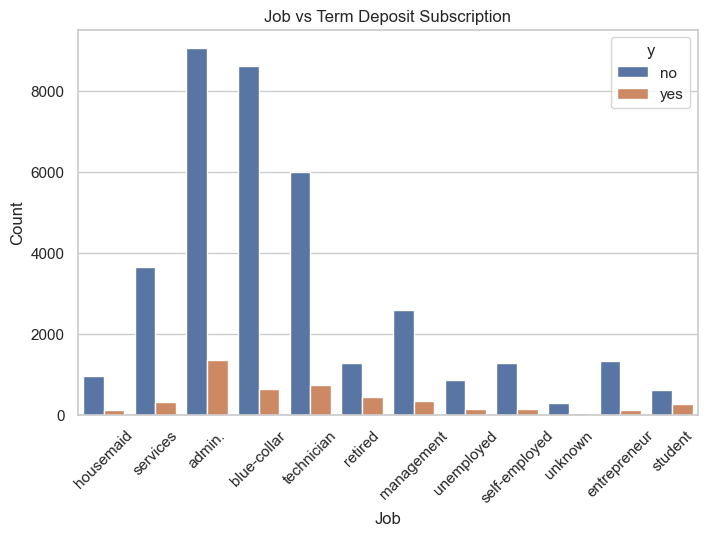

In [28]:
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

In [29]:
job_yes_rate_pct = (
    df.groupby('job')['y']
      .apply(lambda x: (x == 'yes').mean() * 100)
      .sort_values(ascending=False)
)

job_yes_rate_pct

job
student          31.428571
retired          25.261932
unemployed       14.201183
admin.           12.966695
management       11.217510
unknown          11.212121
technician       10.832468
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.142173
blue-collar       6.895061
Name: y, dtype: float64

Although admin, technician, and blue-collar groups show higher absolute numbers of subscriptions, they are also the most frequently contacted job categories. Their higher subscription counts are therefore influenced by contact volume.

In contrast, student and retired customers show the highest subscription rates despite lower contact volumes, indicating a stronger likelihood of subscribing to term deposits.

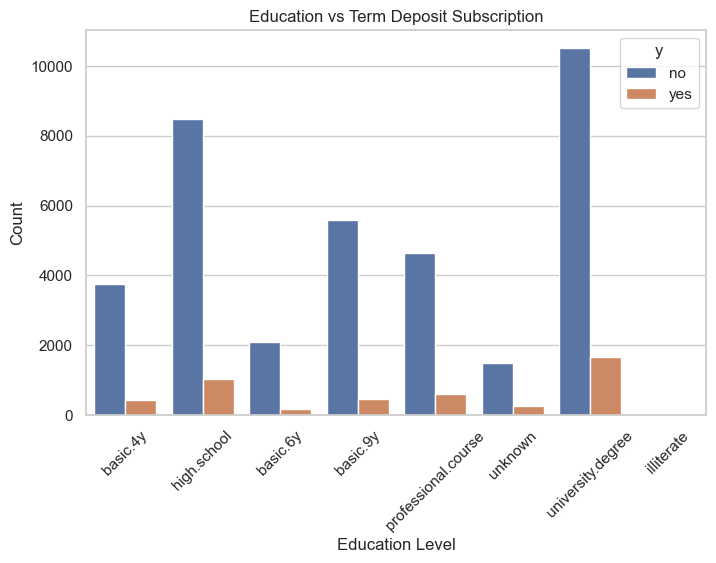

In [30]:
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Education vs Term Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [31]:
job_yes_rate_pct = (
    df.groupby('education')['y']
      .apply(lambda x: (x == 'yes').mean() * 100)
      .sort_values(ascending=False)
)

job_yes_rate_pct

education
illiterate             22.222222
unknown                14.508671
university.degree      13.720816
professional.course    11.354962
high.school            10.838940
basic.4y               10.249042
basic.6y                8.206024
basic.9y                7.824648
Name: y, dtype: float64

Subscription rates vary across education levels. Customers with university degrees and professional courses show higher subscription rates compared to basic education levels. The illiterate category shows a high subscription rate, likely influenced by a very small sample size, and should be interpreted with caution. Overall, education appears to have an influence on subscription behavior, though it is not strictly linear.

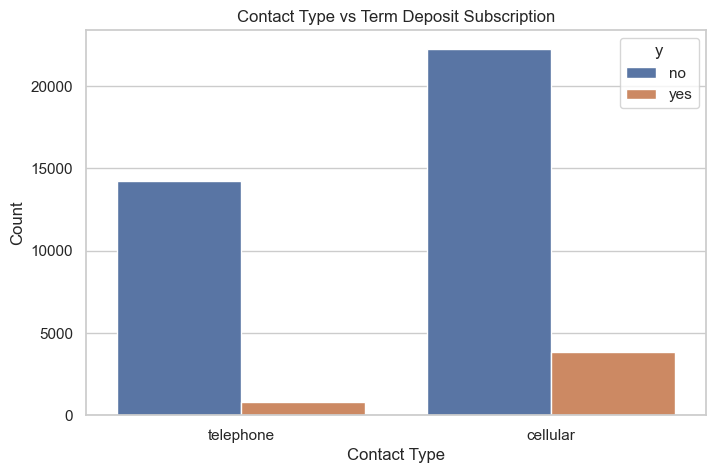

In [32]:
sns.countplot(x='contact', hue='y', data=df)
plt.title('Contact Type vs Term Deposit Subscription')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.show()

- Customers contacted via cellular communication show higher subscription responses compared to telephone contact.
- This suggests that the contact method influences customer engagement during the campaign.

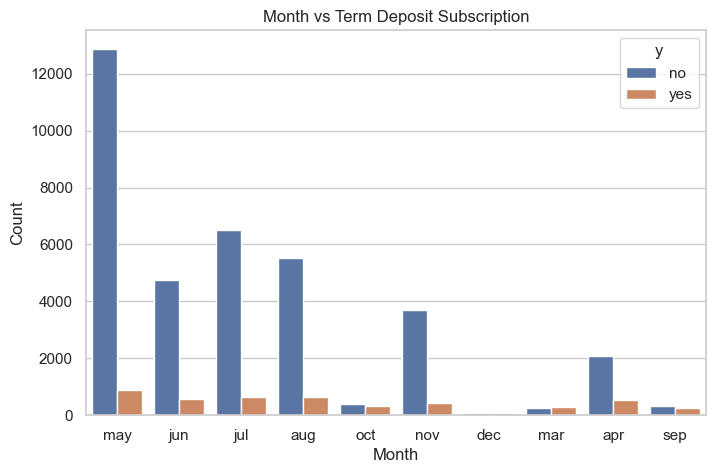

In [33]:
sns.countplot(x='month', hue='y', data=df)
plt.title('Month vs Term Deposit Subscription')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

- Customer subscription responses are not evenly distributed across months, indicating variation in campaign effectiveness over time.

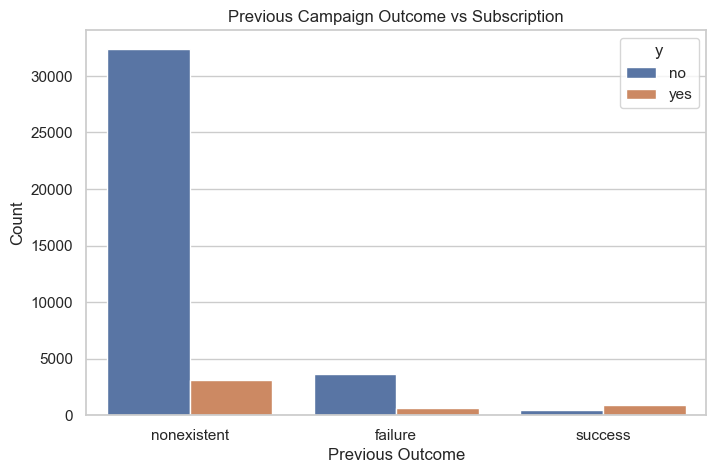

In [34]:
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Previous Campaign Outcome vs Subscription')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

In [35]:
job_yes_rate_pct = (
    df.groupby('poutcome')['y']
      .apply(lambda x: (x == 'yes').mean() * 100)
      .sort_values(ascending=False)
)

job_yes_rate_pct

poutcome
success        65.112891
failure        14.228598
nonexistent     8.832382
Name: y, dtype: float64

Previous campaign outcome shows a strong relationship with subscription behavior. Customers with a successful previous campaign outcome have a very high subscription rate (over 65%), while those with failed or no previous campaign outcomes show much lower subscription rates. This indicates that prior successful engagement is a strong indicator of future subscription.

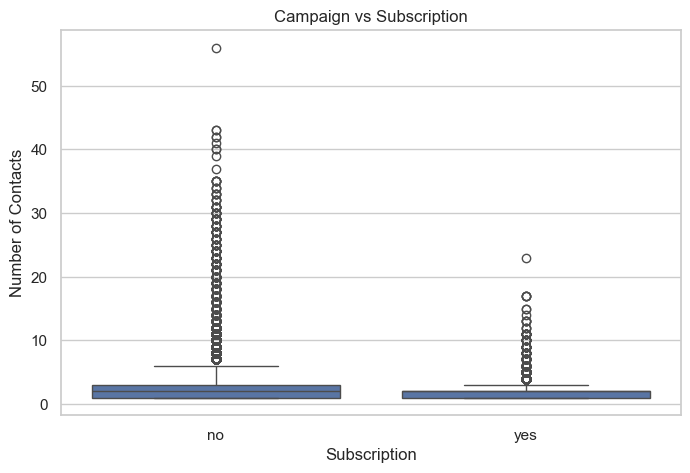

In [36]:
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Campaign vs Subscription')
plt.xlabel('Subscription')
plt.ylabel('Number of Contacts')
plt.show()

Subscribed customers generally required fewer campaign contacts, while non-subscribers show higher and more variable contact counts.

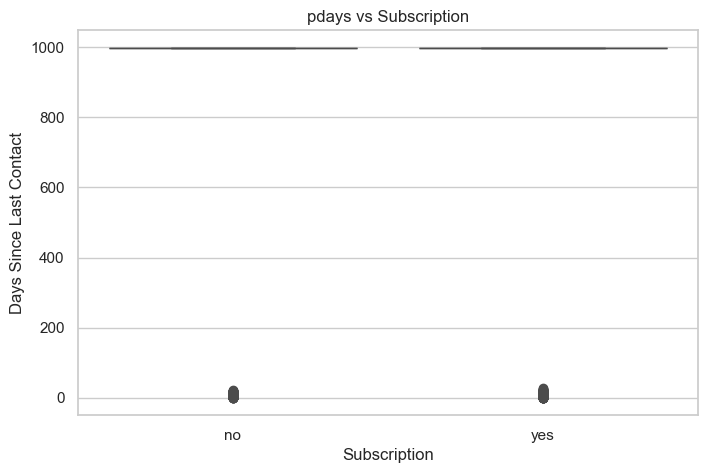

In [37]:
sns.boxplot(x='y', y='pdays', data=df)
plt.title('pdays vs Subscription')
plt.xlabel('Subscription')
plt.ylabel('Days Since Last Contact')
plt.show()

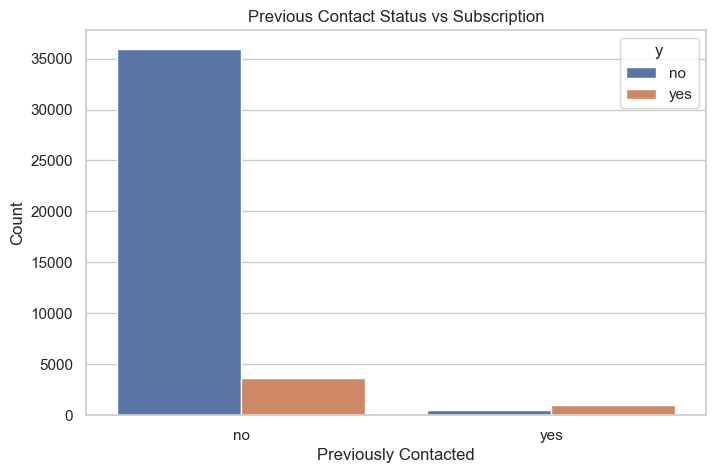

In [38]:
df['previously_contacted'] = df['pdays'].apply(lambda x: 'yes' if x != 999 else 'no')

sns.countplot(x='previously_contacted', hue='y', data=df)
plt.title('Previous Contact Status vs Subscription')
plt.xlabel('Previously Contacted')
plt.ylabel('Count')
plt.show()

Most customers were not contacted in previous campaigns. Customers who had been contacted before show a relatively higher subscription response compared to first-time contacts, indicating that prior engagement influences subscription behavior.

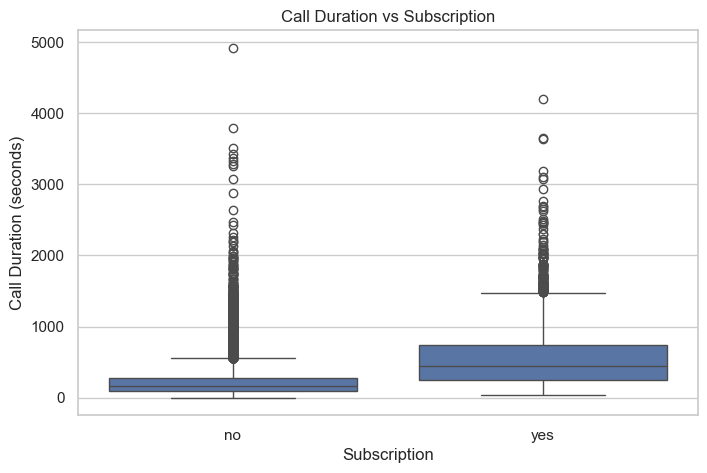

In [39]:
sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration vs Subscription')
plt.xlabel('Subscription')
plt.ylabel('Call Duration (seconds)')
plt.show()

Call duration shows a strong relationship with subscription outcome. Customers who subscribed generally have longer call durations compared to those who did not subscribe. This indicates that successful subscriptions are often associated with longer interactions. However, since call duration is only known after the call is completed, this variable will be excluded from predictive modeling to avoid data leakage.

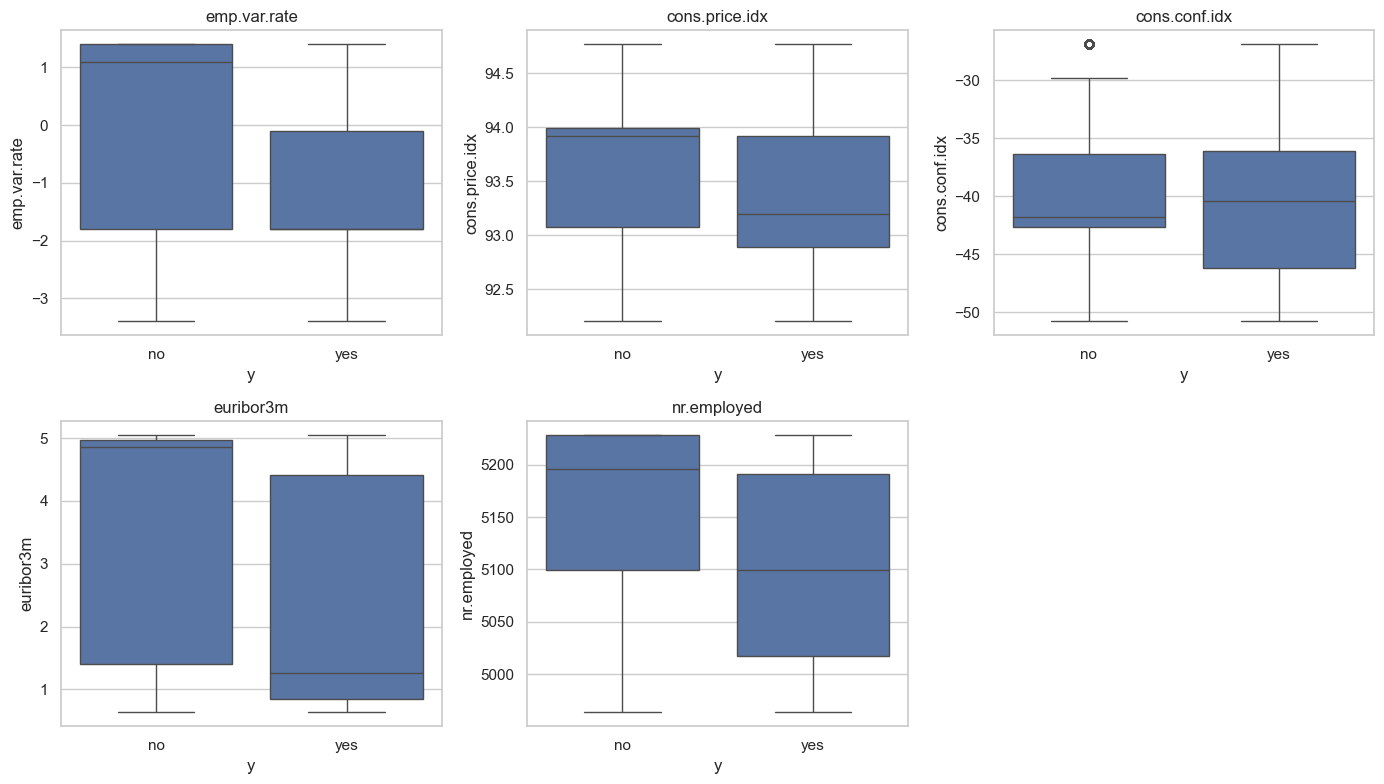

In [40]:
econ_cols = [
    'emp.var.rate', 'cons.price.idx',
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

plt.figure(figsize=(14,8))
for i, col in enumerate(econ_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

Economic indicators provide contextual information about the campaign period and show limited direct separation between subscription outcomes.

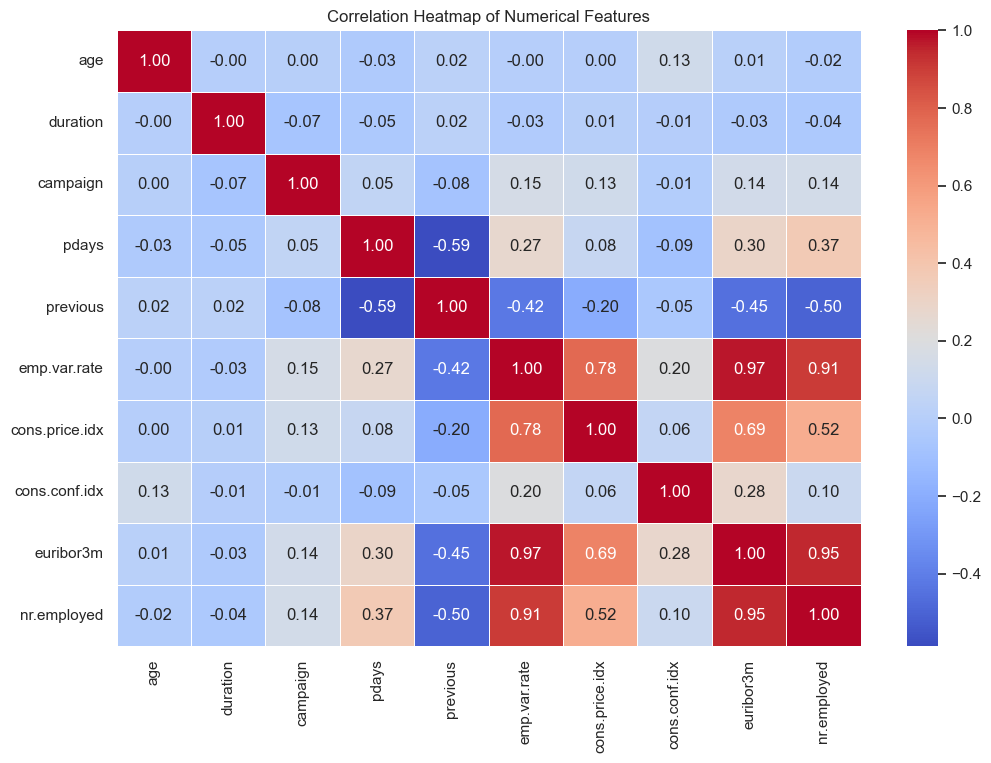

In [41]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_cols.corr()
corr_matrix
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The correlation heatmap highlights linear relationships among numerical features. Strong correlations are observed among the economic indicators such as `emp.var.rate`, `euribor3m`, and `nr.employed`, reflecting their underlying macroeconomic interdependence. 

Customer-level numerical variables such as age, campaign, pdays, and previous show weak correlations with each other, indicating low multicollinearity. Since the target variable is categorical, correlation analysis is limited in explaining subscription behavior and is therefore used primarily as a diagnostic tool rather than a decision-making factor.

## EDA Summary

Exploratory Data Analysis was conducted to understand customer behavior, campaign characteristics, and factors influencing term deposit subscription. The dataset was found to be clean, with no missing values and minimal preprocessing required.

The target variable is highly imbalanced, reflecting the low subscription rate typical of marketing campaigns. Univariate analysis showed that most customers are middle-aged and were contacted a limited number of times, while the majority had no prior campaign interaction. Categorical variables revealed dominant customer segments across job and education categories.

Bivariate analysis highlighted that prior campaign outcome (`poutcome`) has the strongest relationship with subscription behavior, with previously successful customers being far more likely to subscribe. Subscription behavior also varies across job and education categories, while contact type and month show more modest effects. Customers who subscribed generally required fewer campaign contacts, indicating that repeated contact does not necessarily increase subscription likelihood.

Correlation analysis of numerical features revealed strong relationships mainly among economic indicators, while customer-level features showed weak correlations. Overall, customer behavior and campaign-related features appear more influential than demographic or macroeconomic factors, providing clear direction for feature selection and predictive modeling.


# Feature Engineering and Pre-processing

In [42]:
#dropping duration to avoid leakage
df_model = df.drop(columns=['duration'])

In [43]:
df_model

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,no


In [44]:
#handling special values
df_model['y'] = df_model['y'].map({'no': 0, 'yes': 1})
df_model['previously_contacted'] = df_model['pdays'].apply(
    lambda x: 0 if x == 999 else 1
)

In [45]:
df_model

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previously_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [46]:
#encoding
cat_cols = df_model.select_dtypes(include='object').columns
num_cols = df_model.select_dtypes(include=['int64', 'float64']).columns

cat_cols, num_cols

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'],
       dtype='object'),
 Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
        'previously_contacted'],
       dtype='object'))

In [47]:
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Train-Test-Split

In [48]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [49]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [50]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


# Model Building

In [51]:
#creating an evaluation model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [52]:
#logistic regression model
log_reg = LogisticRegression(max_iter=1000)

log_results = evaluate_model(
    log_reg,
    X_train_scaled, X_test_scaled,
    y_train, y_test
)
log_results


{'Accuracy': 0.8989702739459879,
 'Precision': 0.660427807486631,
 'Recall': 0.21293103448275863,
 'F1 Score': 0.3220338983050847}

In [53]:
#decision tree model
dt = DecisionTreeClassifier(random_state=42)

dt_results = evaluate_model(
    dt,
    X_train, X_test,
    y_train, y_test
)
dt_results


{'Accuracy': 0.8382552943462211,
 'Precision': 0.3059185242121445,
 'Recall': 0.3431034482758621,
 'F1 Score': 0.3234457537586347}

In [54]:
#random forest model
rf = RandomForestClassifier(random_state=42)

rf_results = evaluate_model(
    rf,
    X_train, X_test,
    y_train, y_test
)
rf_results


{'Accuracy': 0.8944045074800855,
 'Precision': 0.5621805792163543,
 'Recall': 0.28448275862068967,
 'F1 Score': 0.37779049799656556}

In [55]:
#knn model
knn = KNeighborsClassifier(n_neighbors=5)

knn_results = evaluate_model(
    knn,
    X_train_scaled, X_test_scaled,
    y_train, y_test
)
knn_results


  File "C:\Users\dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


{'Accuracy': 0.8927530600349718,
 'Precision': 0.5444444444444444,
 'Recall': 0.2956896551724138,
 'F1 Score': 0.38324022346368714}

In [56]:
#svm model
svm = SVC(kernel='rbf')

svm_results = evaluate_model(
    svm,
    X_train_scaled, X_test_scaled,
    y_train, y_test
)
svm_results


{'Accuracy': 0.9013988731299786,
 'Precision': 0.6755447941888619,
 'Recall': 0.24051724137931035,
 'F1 Score': 0.3547361729179911}

Feature scaling was applied only for distance-based and linear models, while tree-based models were trained on unscaled data as they are scale-invariant.

# Model Comparison

In [57]:
results_df = pd.DataFrame({
    'Logistic Regression': log_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    'KNN': knn_results,
    'SVM': svm_results
}).T

results_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.898970,0.660428,0.212931,0.322034
Decision Tree,0.838255,0.305919,0.343103,0.323446
Random Forest,0.894405,0.562181,0.284483,0.377790
KNN,0.892753,0.544444,0.295690,0.383240
SVM,0.901399,0.675545,0.240517,0.354736


## Evaluation Summary
The dataset used in this project exhibits a strong class imbalance, with a significantly smaller proportion of customers subscribing to the term deposit. In such scenarios, accuracy alone can be misleading, as a model can achieve high accuracy by predominantly predicting the majority class. Therefore, model evaluation focused primarily on recall and F1-score, which provide a more meaningful assessment of performance for imbalanced classification problems.

Recall was emphasized because, in a bank marketing context, failing to identify a potential subscriber (false negative) represents a missed business opportunity. Capturing as many potential subscribers as possible is more critical than minimizing every false positive. F1-score was used as the primary comparison metric as it balances recall and precision, ensuring that the model does not achieve high recall at the expense of excessive false positives.

Among the evaluated models, Random Forest and K-Nearest Neighbors achieved the highest F1-scores. Random Forest was selected as the final model due to its balanced performance across precision and recall, robustness to noise, and ability to capture non-linear relationships in the data. Additionally, Random Forest handles mixed feature types and complex interactions effectively, which is well-suited to the diverse customer and campaign-related features present in bank marketing data.

Overall, the Random Forest model aligns well with the objectives of bank marketing campaigns by maximizing the identification of potential subscribers while maintaining reliable and stable predictive performance.


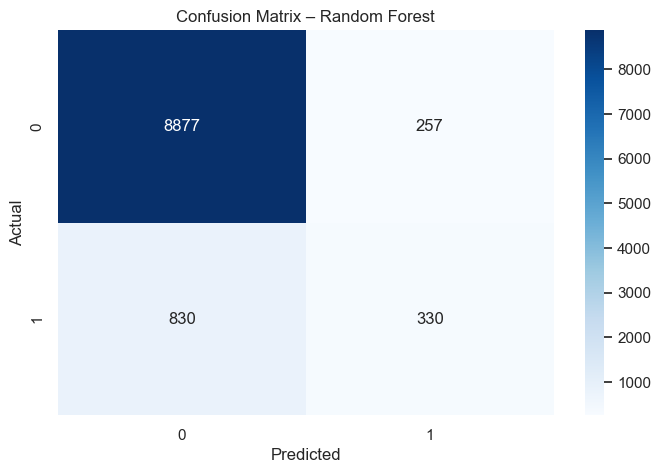

In [58]:
cm = confusion_matrix(y_test, rf.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()

The confusion matrix summarizes the performance of the final Random Forest model by showing the distribution of true positives, true negatives, false positives, and false negatives. The model correctly identifies a large number of non-subscribers, while also capturing a substantial portion of actual subscribers.

False negatives represent customers who would have subscribed but were not identified by the model, corresponding to missed business opportunities. False positives indicate customers predicted to subscribe who did not, leading to additional marketing costs. Given the objectives of bank marketing campaigns, reducing false negatives is prioritized to avoid missing potential subscribers, even if it results in a moderate number of false positives.

Overall, the confusion matrix confirms that the selected model achieves a reasonable balance between identifying potential subscribers and controlling unnecessary outreach.


# Business Recommendations

Based on exploratory analysis and model results, the following recommendations are proposed to improve the effectiveness and cost efficiency of future bank marketing campaigns.

**1. Improve Cost Efficiency by Reducing Over-Contacting**
Analysis of campaign data shows that customers who eventually subscribe typically do so within the first few contacts, while repeated follow-ups are more common among non-subscribers. Excessive contact attempts increase operational costs without proportionate gains in subscriptions.  
**Recommendation:** Limit the number of contact attempts per customer and prioritize early-stage engagement rather than repeated follow-ups.

**2. Leverage Prior Campaign Outcomes for Better Targeting**
Previous campaign outcome (`poutcome`) emerged as the strongest indicator of subscription behavior. Customers who previously subscribed show a significantly higher likelihood of subscribing again.  
**Recommendation:** Prioritize customers with a successful previous campaign outcome, as they represent high-probability targets with better conversion potential.

**3. Focus on High-Conversion Customer Segments**
Subscription rate analysis indicates that certain customer groups, such as students and retired individuals, demonstrate higher conversion rates despite lower contact volumes.  
**Recommendation:** Allocate more marketing resources toward high-conversion segments rather than solely focusing on high-volume customer groups.

**4. Optimize Contact Strategy**
Cellular contact shows slightly better subscription responses compared to telephone contact. While the difference is modest, it aligns with modern communication preferences.  
**Recommendation:** Emphasize mobile-based outreach methods while maintaining alternative channels where appropriate.

**5. Use Predictive Modeling to Guide Campaign Decisions**
The selected Random Forest model effectively balances recall and precision, enabling the bank to identify potential subscribers while minimizing missed opportunities.  
**Recommendation:** Use the predictive model as a decision-support tool to rank customers by subscription likelihood, allowing marketing teams to focus efforts on high-probability leads.

**6. Balance Conversion Improvement with Resource Allocation**
While increasing recall helps identify more potential subscribers, excessive false positives can increase campaign costs.  
**Recommendation:** Adjust decision thresholds based on campaign budget and capacity to achieve an optimal balance between conversion improvement and cost control.

Overall, these recommendations support a more targeted, data-driven marketing approach that improves conversion rates while reducing unnecessary contact costs.

# Challenges Faced

Several challenges were encountered during the development of this project. The dataset exhibited a strong class imbalance, making accuracy an unreliable evaluation metric and requiring greater emphasis on recall and F1-score. Interpreting model performance under this imbalance required careful consideration to avoid misleading conclusions.

Another challenge involved handling categorical variables with many levels, which significantly increased feature dimensionality after encoding. This affected the performance and computational efficiency of certain models, particularly Support Vector Machines.

The presence of the `duration` feature posed a risk of data leakage, as it is only known after the call outcome. Identifying and excluding such features was essential to ensure realistic and deployable model performance.

Additionally, some variables such as `pdays` contained special values that required domain understanding to interpret correctly, as traditional visualizations were not informative. Distinguishing between raw contact volume and actual conversion likelihood also required careful analysis to avoid incorrect inferences.

Despite these challenges, systematic exploratory analysis and thoughtful preprocessing enabled the development of a robust and meaningful predictive model.


# Final Conclusion

This project developed a machine learning model to predict customer subscription to term deposits using bank marketing data. Through exploratory analysis and careful preprocessing, key behavioral and campaign-related factors influencing subscription were identified. Multiple classification models were evaluated with emphasis on recall and F1-score due to class imbalance, and Random Forest was selected for its balanced and reliable performance. The results demonstrate that data-driven customer targeting can improve conversion rates while reducing unnecessary marketing costs, supporting more efficient and effective bank marketing strategies.
